In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [70]:
df = pd.read_csv('epa-sea-level.csv')
df.sample(5)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
34,1914,1.795276,1.251969,2.338583,NaN
70,1950,3.598425,3.287402,3.909449,NaN
117,1997,7.066929,6.803150,7.330709,6.73392
40,1920,1.905512,1.393701,2.417323,NaN
60,1940,2.618110,2.181102,3.055118,NaN


Text(0.5, 1.0, 'Rise in Sea Level')

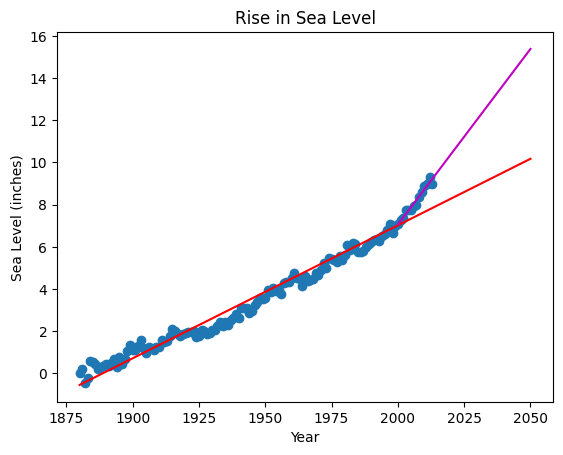

In [74]:
# plot a scatter chart
plt.figure(1)
plt.scatter(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
#
years = pd.Series(list(range(2014, 2051))) 
nans = np.empty(len(years))
nans[:] = np.nan
future_df = pd.DataFrame({
    'Year': years,
    'CSIRO Adjusted Sea Level': nans,
    'Lower Error Bound': nans,
    'Upper Error Bound': nans,
    'NOAA Adjusted Sea Level': nans
    
})
comb_df = pd.concat([df, future_df], ignore_index=True)
#
res = linregress(x=df['Year'], y=df['CSIRO Adjusted Sea Level'])
#
plt.plot(comb_df['Year'], res.intercept + res.slope * comb_df['Year'], 'r')
#
recent_df = df[df['Year'] >= 2000]
#
res2 = linregress(x=recent_df['Year'], y=recent_df['CSIRO Adjusted Sea Level'])
#
comb_df_2 = pd.concat([recent_df, future_df], ignore_index=True)
#
plt.plot(comb_df_2['Year'], res2.intercept + res2.slope * comb_df_2['Year'], 'm')
#
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

In [72]:
#y = list(range(134, 171))
#x = pd.Series(list(range(2014, 2051)), index=y) 
#future_years = df['Year'].append(x)
#future_years

In [73]:
# plot a prediction up to the year 2050
#future_df = df.append([{'Year': y} for y in range((df['Year'].max() + 1), 2051)])
#future_df
#plt.scatter(
#    df['Year'],
#    df['CSIRO Adjusted Sea Level']
#)
#plt.plot(
#    future_df['Year'],
#    res.intercept + res.slope * future_df['Year'],
#    c='r'
#)
#future_df = pd.concat([df, pd.Series(list(range((df['Year'].max() + 1), 2051)), name='Year')], ignore_index=True)
#future_df
#future_df = df.join(pd.Series(list(range((df['Year'].max() + 1), 2051)), name='Year', index=list(range(134, 171))), on='Year', how='outer', lsuffix='__')
#future_df